In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import wilcoxon

sns.set_theme(style="whitegrid", font_scale=1.5)

# RQ1-RQ2: Methods Comparison

In [2]:
baseline = pd.read_csv('s3_baseline/full_results.csv')
baseline['fitness'] = 'SD3'

In [3]:
img_q = pd.read_csv('s3_nsgaii_results_image/results.csv')
img_q['fitness'] = 'Q'

In [4]:
bias = pd.read_csv('s3_nsgaii_results_bias/results.csv')
bias['fitness'] = 'Q+B'

In [5]:
random_search = pd.read_csv('s3_random_search/full_results.csv')
random_search['fitness'] = 'RS'

In [ ]:
full = pd.read_csv('s3_nsgaii_results_all/full_results.csv')
full['fitness'] = 'SustainDiff'

In [23]:
cpu = pd.read_csv('s3_nsgaii_results_cpu/results.csv')
cpu['fitness'] = 'Q+E'

In [24]:
full_noprompt = pd.read_csv('s3_nsgaii_results_noprompt/results.csv')
full_noprompt['fitness'] = 'N.P.E.'

In [25]:
full_data = pd.concat([baseline, random_search, full_noprompt, img_q, bias, cpu, full], ignore_index=True)

In [26]:
# 0-1 normalize Ethnicity Fitness column
full_data['Ethnicity Fitness'] = (full_data['Ethnicity Fitness'] - np.min(full_data['Ethnicity Fitness'])) / (np.max(full_data['Ethnicity Fitness']) - np.min(full_data['Ethnicity Fitness']))

In [27]:
full_data.drop(columns='Solution', inplace=True)

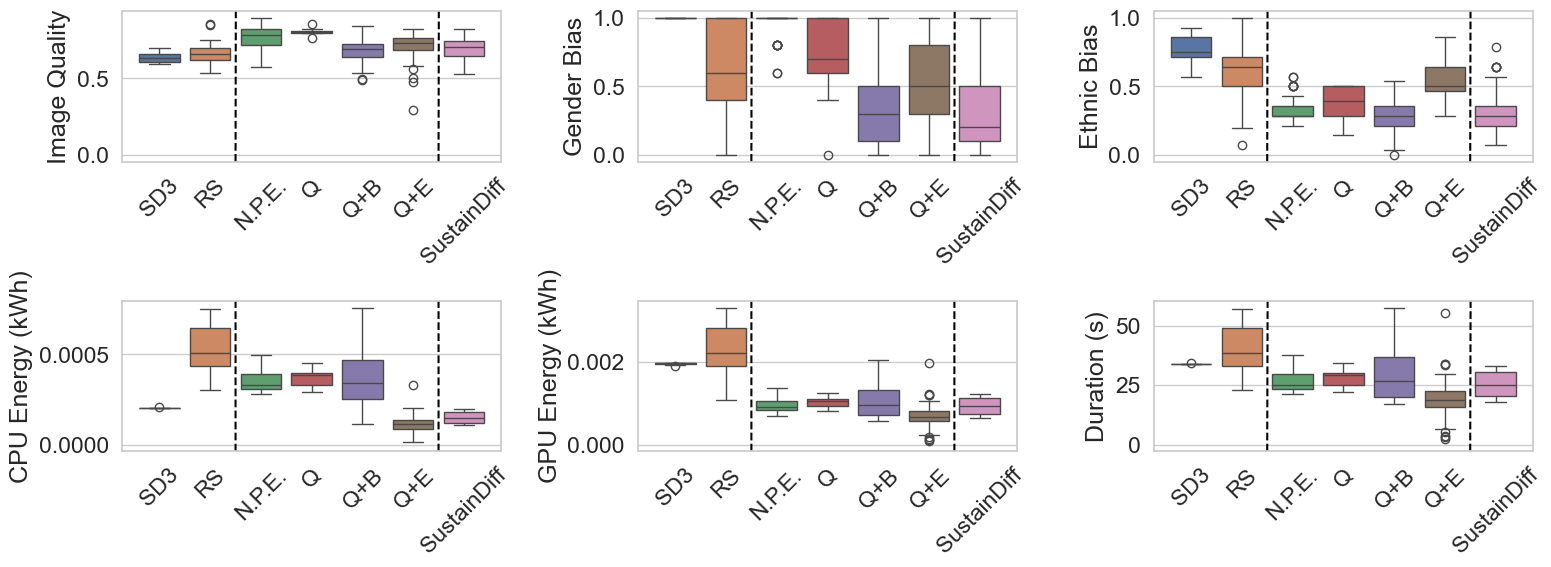

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(16, 6))

sns.boxplot(data=full_data, x='fitness', y='Image Quality', hue="fitness", ax=ax[0, 0])
sns.boxplot(data=full_data, x='fitness', y='Gender Fitness', hue="fitness", ax=ax[0, 1])
sns.boxplot(data=full_data, x='fitness', y='Ethnicity Fitness', hue="fitness", ax=ax[0, 2])
sns.boxplot(data=full_data, x='fitness', y='CPU Energy', hue="fitness", ax=ax[1, 0])
sns.boxplot(data=full_data, x='fitness', y='GPU Energy', hue="fitness", ax=ax[1, 1])
sns.boxplot(data=full_data, x='fitness', y='Duration', hue="fitness", ax=ax[1, 2])

ax[0, 0].set_xlabel('')
ax[0, 0].xaxis.set_tick_params(rotation=45)
ax[0, 0].axline((1.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[0, 0].axline((5.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[0, 1].set_xlabel('')
ax[0, 1].xaxis.set_tick_params(rotation=45)
ax[0, 1].set_ylabel('Gender Bias')
ax[0, 1].axline((1.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[0, 1].axline((5.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[0, 2].set_xlabel('')
ax[0, 2].xaxis.set_tick_params(rotation=45)
ax[0, 2].set_ylabel('Ethnic Bias')
ax[0, 2].axline((1.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[0, 2].axline((5.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[1, 0].set_xlabel('')
ax[1, 0].xaxis.set_tick_params(rotation=45)
ax[1, 0].set_ylabel('CPU Energy (kWh)')
ax[1, 0].axline((1.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[1, 0].axline((5.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[1, 1].set_xlabel('')
ax[1, 1].xaxis.set_tick_params(rotation=45)
ax[1, 1].set_ylabel('GPU Energy (kWh)')
ax[1, 1].axline((1.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[1, 1].axline((5.5, 0), slope=180, color='black', linestyle='--', label='Ideal Trade-off')
ax[1, 2].set_xlabel('')
ax[1, 2].set_ylabel('Duration (s)')
ax[1, 2].xaxis.set_tick_params(rotation=45)
ax[1, 2].axline((1.5, 0), slope=8000, color='black', linestyle='--', label='Ideal Trade-off')
ax[1, 2].axline((5.5, 0), slope=8000, color='black', linestyle='--', label='Ideal Trade-off')

plt.tight_layout()
plt.savefig('imgs/full_tradeoff.pdf', bbox_inches='tight')
plt.show()

In [16]:
full_data = full_data.drop(columns=['Individual', 'Gender Count', 'Ethnicity Count'])

In [17]:
full_data

,Round,Image Quality,Gender Fitness,Ethnicity Fitness,Duration,CPU Energy,GPU Energy,fitness
0,round_1,0.700455,1.0,0.857143,33.711416,0.000202,0.001899,SD3
1,round_2,0.642963,1.0,0.785714,33.836805,0.000203,0.001920,SD3
2,round_3,0.662429,1.0,0.714286,33.750125,0.000202,0.001935,SD3
3,round_4,0.647667,1.0,0.857143,33.736723,0.000202,0.001957,SD3
4,round_5,0.616393,1.0,0.857143,34.146487,0.000208,0.001966,SD3
...,...,...,...,...,...,...,...,...
489,round_7,0.718095,0.0,0.357143,23.806406,0.000142,0.000887,SustainDiff
490,round_7,0.676522,0.1,0.142857,23.805407,0.000143,0.000893,SustainDiff
491,round_7,0.674737,0.0,0.357143,23.856998,0.000143,0.000887,SustainDiff
492,round_7,0.641364,0.0,0.285714,23.861618,0.000144,0.000891,SustainDiff


In [18]:
def float_exponent_notation(float_number, precision_digits, format_type="g"):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with `precision_digits` digits of
    mantissa precision, printing a normal decimal if an
    exponent isn't necessary.
    """
    e_float = "{0:.{1:d}{2}}".format(float_number, precision_digits, format_type)
    if "e" not in e_float:
        return "${}$".format(e_float)
    mantissa, exponent = e_float.split("e")
    cleaned_exponent = exponent.strip("+")
    return "${0} \\times 10^{{{1}}}$".format(mantissa, cleaned_exponent)

In [19]:
stats = full_data.groupby(['fitness'])[['Image Quality', 'Gender Fitness', 'Ethnicity Fitness', 'Duration', 'CPU Energy', 'GPU Energy']].agg(['mean', 'std']).reset_index()

In [20]:
for col in stats.columns.get_level_values(0).unique():
    print(col)
    if col != 'fitness':
        stats[col] = stats[col].map(lambda x: float_exponent_notation(x, 2))


fitness
Image Quality
Gender Fitness
Ethnicity Fitness
Duration
CPU Energy
GPU Energy


In [21]:
# combine mean and std into a single column
stats['Img Q'] = stats[('Image Quality', 'mean')].astype(str) + '$\pm$' + stats[('Image Quality', 'std')].astype(str)
stats['Gender Bias'] = stats[('Gender Fitness', 'mean')].astype(str) + '$\pm$' + stats[('Gender Fitness', 'std')].astype(str)
stats['Ethnicity Bias'] = stats[('Ethnicity Fitness', 'mean')].astype(str) + '$\pm$' + stats[('Ethnicity Fitness', 'std')].astype(str)
stats['CPU'] = stats[('CPU Energy', 'mean')].astype(str) + '$\pm$' + stats[('CPU Energy', 'std')].astype(str)
stats['GPU'] = stats[('GPU Energy', 'mean')].astype(str) + '$\pm$' + stats[('GPU Energy', 'std')].astype(str)
stats['Time'] = stats[('Duration', 'mean')].astype(str) + '$\pm$' + stats[('Duration', 'std')].astype(str)
# drop all 'mean' and 'std' columns
stats = stats.drop(columns=[('Image Quality', 'mean'), ('Image Quality', 'std'), ('Gender Fitness', 'mean'), ('Gender Fitness', 'std'), ('Ethnicity Fitness', 'mean'), ('Ethnicity Fitness', 'std'), ('Duration', 'mean'), ('Duration', 'std'), ('CPU Energy', 'mean'), ('CPU Energy', 'std'), ('GPU Energy', 'mean'), ('GPU Energy', 'std')])

In [22]:
stats.columns = stats.columns.droplevel(1)

In [23]:
stats

,fitness,Img Q,Gender Bias,Ethnicity Bias,CPU,GPU,Time
0,N.P.E.,$0.77$$\pm$$0.078$,$0.97$$\pm$$0.082$,$0.34$$\pm$$0.084$,$0.00035$$\pm$$5.6 \times 10^{-05}$,$0.00096$$\pm$$0.00016$,$27$$\pm$$4.3$
1,Q,$0.81$$\pm$$0.023$,$0.7$$\pm$$0.33$,$0.38$$\pm$$0.13$,$0.00037$$\pm$$5.5 \times 10^{-05}$,$0.001$$\pm$$0.00015$,$28$$\pm$$4.2$
2,Q+B,$0.68$$\pm$$0.067$,$0.37$$\pm$$0.3$,$0.28$$\pm$$0.11$,$0.00037$$\pm$$0.00015$,$0.0011$$\pm$$0.00038$,$30$$\pm$$11$
3,Q+E,$0.71$$\pm$$0.092$,$0.52$$\pm$$0.29$,$0.53$$\pm$$0.13$,$0.00012$$\pm$$5.4 \times 10^{-05}$,$0.0007$$\pm$$0.00033$,$20$$\pm$$9.1$
4,RS,$0.67$$\pm$$0.072$,$0.61$$\pm$$0.34$,$0.62$$\pm$$0.21$,$0.00054$$\pm$$0.00012$,$0.0023$$\pm$$0.00058$,$41$$\pm$$9.4$
5,SD3,$0.64$$\pm$$0.037$,$1$$\pm$$0$,$0.76$$\pm$$0.11$,$0.0002$$\pm$$2 \times 10^{-06}$,$0.0019$$\pm$$2.3 \times 10^{-05}$,$34$$\pm$$0.13$
6,SustainDiff,$0.69$$\pm$$0.066$,$0.32$$\pm$$0.29$,$0.31$$\pm$$0.14$,$0.00015$$\pm$$3.1 \times 10^{-05}$,$0.00094$$\pm$$0.0002$,$25$$\pm$$5.3$


In [24]:
stats.to_latex('tables/stats.tex', float_format="%.3f", index=False)

Text(25.39484374999998, 0.5, 'Duration (s)')

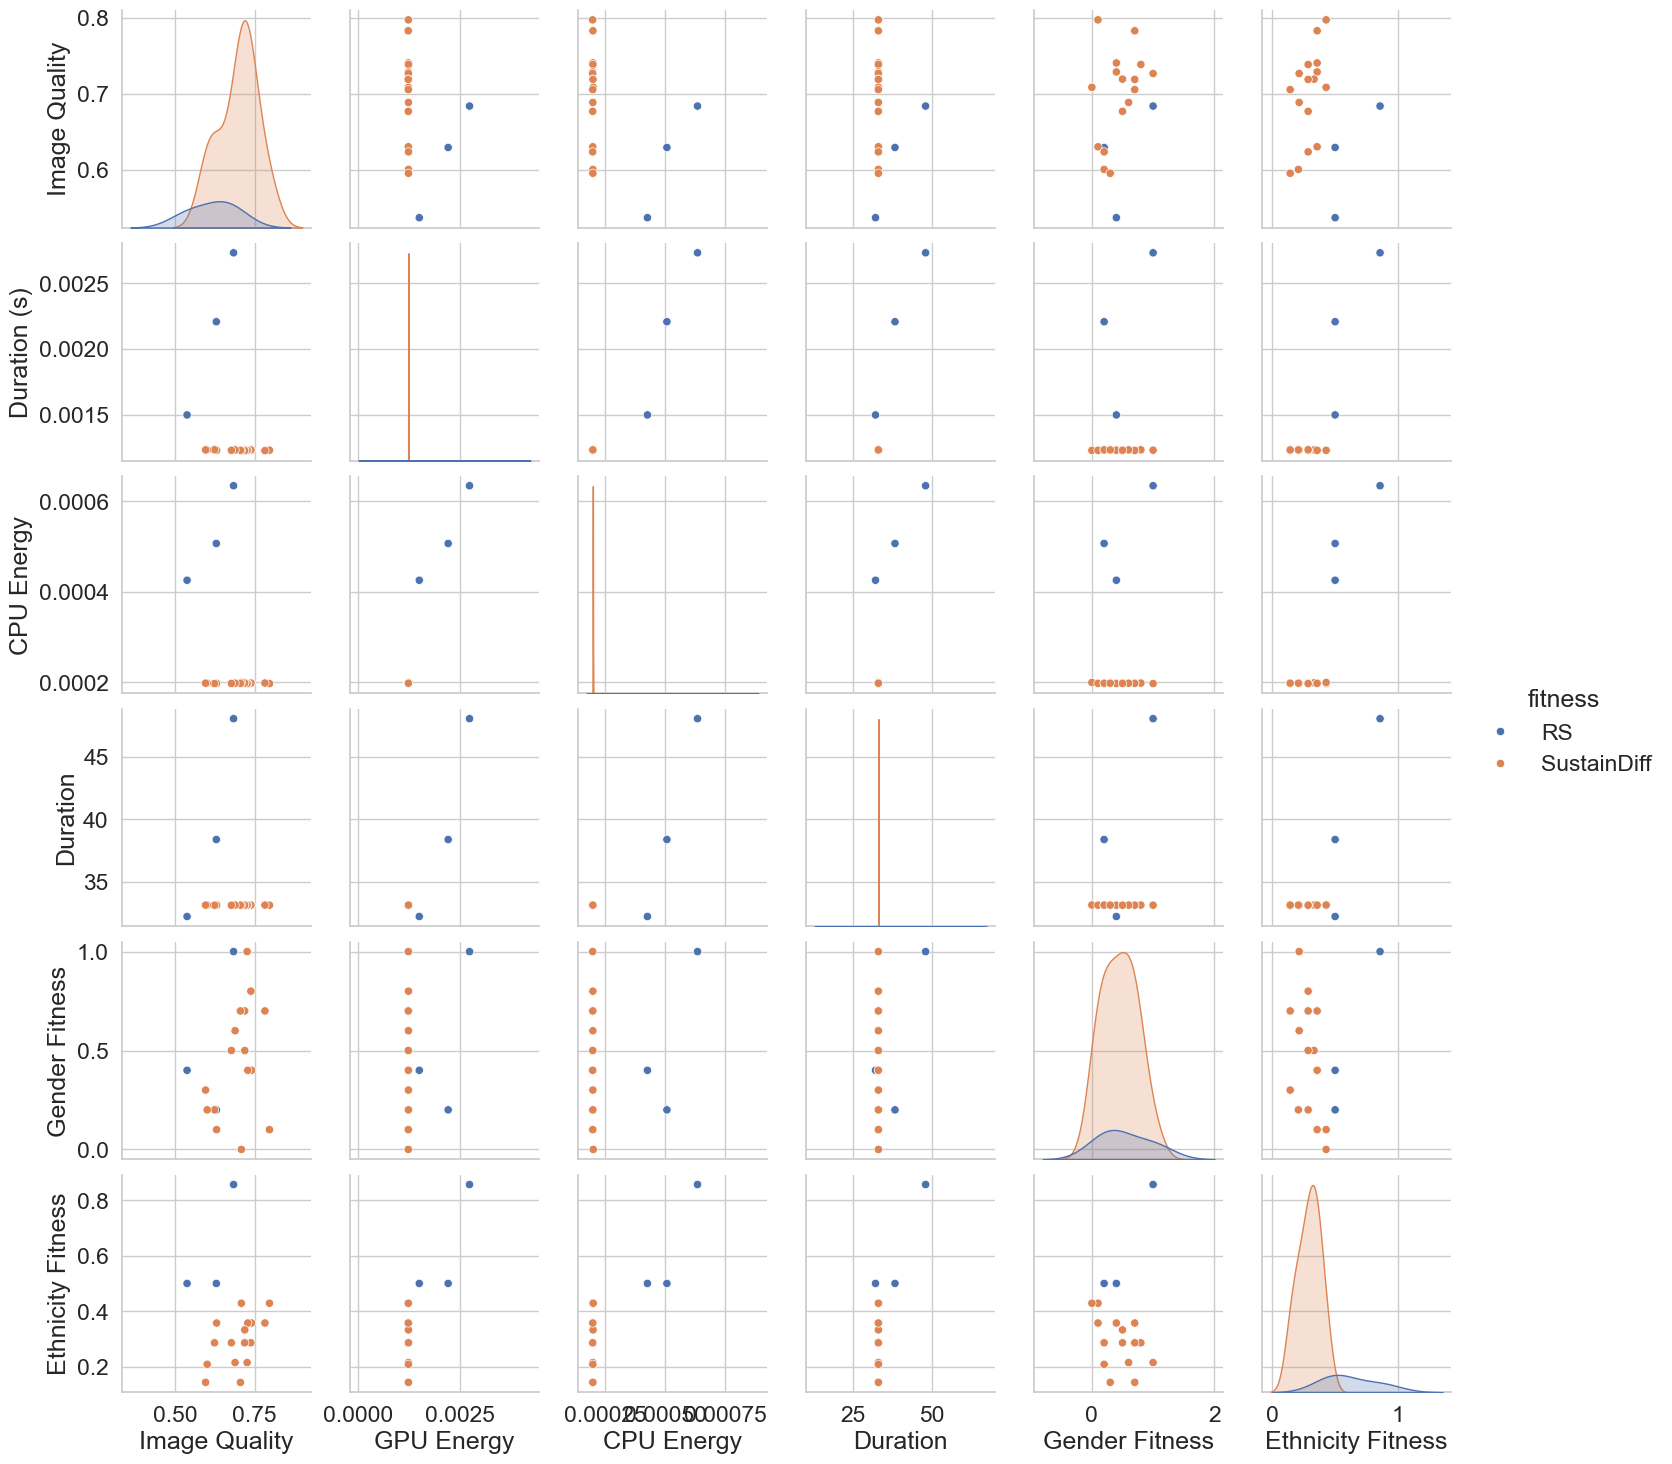

In [25]:
full_data_plot = full_data[full_data['fitness'].isin(['Baseline', 'RS', 'SustainDiff'])]

g = sns.pairplot(full_data_plot[full_data_plot['Round'] == 'round_1'], hue='fitness', vars=['Image Quality', 'GPU Energy', 'CPU Energy', 'Duration', 'Gender Fitness', 'Ethnicity Fitness'], kind='scatter')

# Invert x and y axes for 
# ax[0, 0].set_xlim(ax[0, 0].get_xlim()[::-1])
# ax[0, 1].set_xlim(ax[0, 1].get_xlim()[::-1])
# ax[0, 2].set_xlim(ax[0, 2].get_xlim()[::-1])

# ax[1, 0].set_xlim(ax[1, 0].get_xlim()[::-1])
# ax[1, 0].set_ylim(ax[1, 0].get_ylim()[::-1])
# ax[1, 1].set_xlim(ax[1, 1].get_xlim()[::-1])
# ax[1, 1].set_ylim(ax[1, 1].get_ylim()[::-1])
# ax[1, 2].set_xlim(ax[1, 2].get_xlim()[::-1])
# ax[1, 2].set_ylim(ax[1, 2].get_ylim()[::-1])    

g.axes[0, 0].set_ylabel('Image Quality')
g.axes[0, 1].set_ylabel('GPU Energy (kWh)')
g.axes[0, 2].set_ylabel('CPU Energy (kWh)')
g.axes[1, 0].set_ylabel('Duration (s)')

### Correlation study

In [34]:
full[['Image Quality', 'Gender Fitness', 'Ethnicity Fitness', 'CPU Energy', 'GPU Energy', 'Duration']].corr("spearman")

,Image Quality,Gender Fitness,Ethnicity Fitness,CPU Energy,GPU Energy,Duration
Image Quality,1.000000,0.240499,0.471217,-0.100787,-0.117225,-0.120355
Gender Fitness,0.240499,1.000000,-0.292660,0.178273,0.172412,0.167857
Ethnicity Fitness,0.471217,-0.292660,1.000000,0.070381,0.059950,0.064398
CPU Energy,-0.100787,0.178273,0.070381,1.000000,0.986578,0.990001
GPU Energy,-0.117225,0.172412,0.059950,0.986578,1.000000,0.989317
Duration,-0.120355,0.167857,0.064398,0.990001,0.989317,1.000000


### Statistical Test

In [26]:
def wilcoxon_stat(our, baseline):
  img_q = wilcoxon(our['Image Quality'], baseline['Image Quality'], alternative='greater')
  gb = wilcoxon(our['Gender Fitness'], baseline['Gender Fitness'], alternative='less')
  eb = wilcoxon(our['Ethnicity Fitness'], baseline['Ethnicity Fitness'], alternative='less')
  cpu =  wilcoxon(our['CPU Energy'], baseline['CPU Energy'], alternative='less')
  gpu =  wilcoxon(our['GPU Energy'], baseline['GPU Energy'], alternative='less')
  time = wilcoxon(our['Duration'], baseline['Duration'], alternative='less')
  return pd.DataFrame(index=['ImgQ', 'GB', 'EB', 'CPU', 'GPU', 'Time'], 
                      data={
                        'p-val': [img_q['p-val'].values, gb['p-val'].values, eb['p-val'].values, cpu['p-val'].values, gpu['p-val'].values, time['p-val'].values],
                        'effect size': [img_q['CLES'].values, gb['CLES'].values, eb['CLES'].values, cpu['CLES'].values, gpu['CLES'].values, time['CLES'].values]
                        }
  )

In [27]:
full_avg = full.drop(columns=['Solution', 'fitness'])
full_avg = full_avg.groupby('Round').mean()

In [28]:
rs_avg = random_search.drop(columns=['Individual', 'Gender Count', 'Ethnicity Count', 'fitness'])
rs_avg = rs_avg.groupby('Round').mean()

In [29]:
bias_avg = bias.drop(columns=['Solution', 'fitness'])
bias_avg = bias_avg.groupby('Round').mean()

In [30]:
imgq_avg = img_q.drop(columns=['Solution', 'fitness'])
imgq_avg = imgq_avg.groupby('Round').mean()

In [31]:
cpu_avg = cpu.drop(columns=['Solution', 'fitness'])
cpu_avg = cpu_avg.groupby('Round').mean()

In [32]:
noprompt_avg = full_noprompt.drop(columns=['Solution', 'fitness'])
noprompt_avg = noprompt_avg.groupby('Round').mean()

In [33]:
wilcoxon_stat(full_avg, baseline)

,p-val,effect size
ImgQ,[0.001953125],[0.9]
GB,[0.0009765625],[1.0]
EB,[0.0009765625],[1.0]
CPU,[0.0009765625],[1.0]
GPU,[0.0009765625],[1.0]
Time,[0.0009765625],[1.0]


In [34]:
wilcoxon_stat(full_avg, rs_avg)

,p-val,effect size
ImgQ,[0.1162109375],[0.61]
GB,[0.0009765625],[0.945]
EB,[0.0009765625],[0.98]
CPU,[0.0009765625],[1.0]
GPU,[0.0009765625],[1.0]
Time,[0.0009765625],[0.98]


In [35]:
wilcoxon_stat(full_avg, imgq_avg)

,p-val,effect size
ImgQ,[1.0],[0.0]
GB,[0.0048828125],[0.87]
EB,[0.0419921875],[0.6699999999999999]
CPU,[0.0009765625],[1.0]
GPU,[0.080078125],[0.71]
Time,[0.0654296875],[0.71]


In [36]:
wilcoxon_stat(full_avg, bias_avg)

,p-val,effect size
ImgQ,[0.24609375],[0.67]
GB,[0.1611328125],[0.6599999999999999]
EB,[0.9755859375],[0.22999999999999998]
CPU,[0.001953125],[0.98]
GPU,[0.080078125],[0.72]
Time,[0.0322265625],[0.77]


In [37]:
wilcoxon_stat(full_avg, cpu_avg)

,p-val,effect size
ImgQ,[0.9033203125],[0.32]
GB,[0.009765625],[0.9]
EB,[0.0009765625],[1.0]
CPU,[0.990234375],[0.24]
GPU,[0.9990234375],[0.18000000000000005]
Time,[0.990234375],[0.24]


In [38]:
wilcoxon_stat(full_avg, noprompt_avg)

,p-val,effect size
ImgQ,[1.0],[0.0]
GB,[0.0009765625],[1.0]
EB,[0.0048828125],[0.81]
CPU,[0.0009765625],[1.0]
GPU,[0.2783203125],[0.65]
Time,[0.080078125],[0.69]


## Pareto Optimality

In [134]:
base_pareto = pd.read_csv('s3_baseline/pareto_front.csv')
base_pareto['fitness'] = 'SD3'
rs_pareto = pd.read_csv('s3_random_search/pareto_front.csv')
rs_pareto['fitness'] = 'RS'
imgq_pareto = pd.read_csv('s3_nsgaii_results_image/pareto_front.csv')
imgq_pareto['fitness'] = 'Img Q'
bias_pareto = pd.read_csv('s3_nsgaii_results_bias/pareto_front.csv')
bias_pareto['fitness'] = 'Bias'
energy_pareto = pd.read_csv('s3_nsgaii_results_cpu/pareto_front.csv')
energy_pareto['fitness'] = 'Energy'
full_pareto = pd.read_csv('s3_nsgaii_results_all/pareto_front.csv')
full_pareto['fitness'] = 'SustainDiff'

data_full = pd.concat([full_pareto, base_pareto, rs_pareto, imgq_pareto, bias_pareto, energy_pareto, full_noprompt], ignore_index=True)

In [135]:
def pareto_front_full(df):
    df = df.sort_values(by=['Image Quality', 'Gender Fitness', 'Ethnicity Fitness', 'Duration', 'CPU Energy', 'GPU Energy'], ascending=[False, True, True, True, True, True])
    pareto = []
    for i in range(len(df)):
        if not any((df.iloc[i]['Image Quality'] <= p['Image Quality'] and
                    df.iloc[i]['Duration'] >= p['Duration'] and
                    df.iloc[i]['CPU Energy'] >= p['CPU Energy'] and
                    df.iloc[i]['GPU Energy'] >= p['GPU Energy'] and
                    df.iloc[i]['Gender Fitness'] >= p['Gender Fitness'] and
                    df.iloc[i]['Ethnicity Fitness'] >= p['Ethnicity Fitness']) for p in pareto):
            pareto.append(df.iloc[i])
    return pd.DataFrame(pareto)

In [136]:
pareto = pareto_front_full(full_data)

In [137]:
pareto.fitness.value_counts()

fitness
SustainDiff    28
Q+B            23
Q+E            14
N.P.E.          6
Q               5
RS              2
Name: count, dtype: int64

### Hypervolume Score

In [138]:
from pymoo.indicators.hv import Hypervolume

In [139]:
def compute_hypervolume(df, strategy):
    hypervolumes = pd.DataFrame()
    df = df.copy()
    df['Image Quality'] = 1 - df['Image Quality']
    #ref_point = np.array([1, 1, 1, 1, 1, 100])
    ref_point = np.array([max(full_data['Image Quality']) + 0.05, max(full_data['Gender Fitness']) + 0.05, max(full_data['Ethnicity Fitness'])+ 0.05, max(full_data['CPU Energy']) + 0.05, max(full_data['GPU Energy']) + 0.05, max(full_data['Duration']) + 0.05])
    hv = Hypervolume(ref_point=ref_point)
    for round in df['Round'].unique():
        round_data = df[df['Round'] == round]
        hv_score = hv(round_data[['Image Quality', 'Gender Fitness', 'Ethnicity Fitness', 'CPU Energy', 'GPU Energy', 'Duration']].values)
        hypervolumes = pd.concat([hypervolumes, pd.DataFrame({'Round': [round], 'Hypervolume Score': [hv_score]})], ignore_index=True)
    hypervolumes['Strategy'] = strategy
    return hypervolumes

In [140]:
bias_hv = compute_hypervolume(full_pareto, 'Q+B*')
baseline_hv = compute_hypervolume(base_pareto, 'SD3')
img_q_hv = compute_hypervolume(imgq_pareto, 'Q')
sustain_diff_hv = compute_hypervolume(bias_pareto, 'SustainDiff')
cpu_hv = compute_hypervolume(energy_pareto, 'Q+E')
rs_hv = compute_hypervolume(random_search, 'RS')
noprompt_hv = compute_hypervolume(full_noprompt, 'N.P.E.')


In [141]:
full_hv = pd.concat([baseline_hv, rs_hv, noprompt_hv, img_q_hv, bias_hv, cpu_hv, sustain_diff_hv], ignore_index=True)

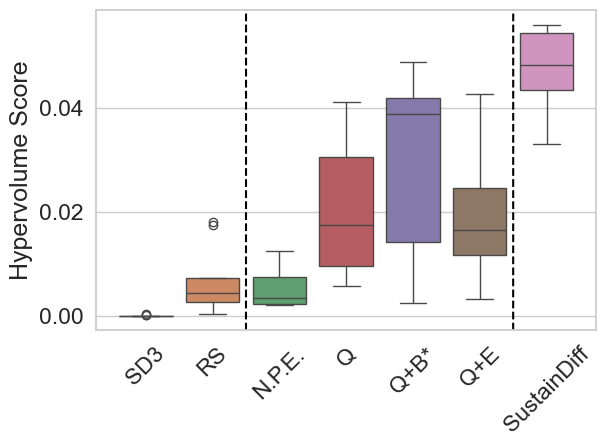

In [142]:
g = sns.boxplot(data=full_hv, x='Strategy', y='Hypervolume Score', hue="Strategy")
plt.xlabel('')
plt.xticks(rotation=45)
g.axline((1.5, 0), slope=90, color='black', linestyle='--', label='Ideal Trade-off')
g.axline((5.5, 0), slope=90, color='black', linestyle='--', label='Ideal Trade-off')
# plt.vlines([1.5], 0, 0.0, color='black', linestyle='--', label='Ideal Trade-off')
plt.tight_layout()
plt.savefig('imgs/hypervolume.pdf', bbox_inches='tight')

In [49]:
full_hv

,Round,Hypervolume Score,Strategy
0,round_1,0.000000,Baseline
1,round_6,0.000293,Baseline
2,round_21,0.000000,Baseline
3,round_29,0.000000,Baseline
4,round_19,0.000000,Baseline
...,...,...,...
59,round_10,0.055979,SustainDiff
60,round_1,0.045084,SustainDiff
61,round_4,0.055322,SustainDiff
62,round_3,0.051687,SustainDiff


# RQ3: Variability between Rounds

In [ ]:
variability = full_data[['Image Quality', 'Gender Fitness', 'Ethnicity Fitness', 'CPU Energy', 'GPU Energy', 'Duration', 'fitness', 'Round']].groupby(['fitness', 'Round']).agg(['mean', 'std']).reset_index()

In [ ]:
variability = variability[variability['fitness'] == 'SustainDiff']

In [ ]:
sd_variability = full.melt(id_vars=['Round', 'fitness'],
                           value_vars=['Image Quality', 'Gender Fitness', 'Ethnicity Fitness', 'CPU Energy', 'GPU Energy', 'Duration'],
                           var_name='Metric',
                           value_name='Value')

In [ ]:
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

In [ ]:
full

,Solution,Round,Image Quality,Gender Fitness,Ethnicity Fitness,Duration,CPU Energy,GPU Energy,fitness
0,"{'denoising_steps': 35, 'guidance_scale': 8, '...",round_2,0.807391,0.9,0.630435,20.254196,0.000122,0.000749,SustainDiff
1,"{'denoising_steps': 34, 'guidance_scale': 4, '...",round_2,0.772174,0.1,0.800000,20.256189,0.000121,0.000756,SustainDiff
2,"{'denoising_steps': 37, 'guidance_scale': 10, ...",round_2,0.754737,0.6,0.400000,20.260071,0.000122,0.000756,SustainDiff
3,"{'denoising_steps': 35, 'guidance_scale': 3, '...",round_2,0.749545,0.5,0.500000,20.245620,0.000122,0.000750,SustainDiff
4,"{'denoising_steps': 46, 'guidance_scale': 3, '...",round_2,0.743636,0.1,0.700000,20.268254,0.000122,0.000753,SustainDiff
...,...,...,...,...,...,...,...,...,...
127,"{'denoising_steps': 29, 'guidance_scale': 12, ...",round_7,0.718095,0.0,0.600000,23.806406,0.000142,0.000887,SustainDiff
128,"{'denoising_steps': 29, 'guidance_scale': 12, ...",round_7,0.676522,0.1,0.300000,23.805407,0.000143,0.000893,SustainDiff
129,"{'denoising_steps': 39, 'guidance_scale': 15, ...",round_7,0.674737,0.0,0.600000,23.856998,0.000143,0.000887,SustainDiff
130,"{'denoising_steps': 29, 'guidance_scale': 12, ...",round_7,0.641364,0.0,0.500000,23.861618,0.000144,0.000891,SustainDiff


In [ ]:
kruskal(*[full[full['Round'] == r]['Image Quality'].values for r in full['Round'].unique()])

KruskalResult(statistic=4.988622812025085, pvalue=0.8352989077826892)

In [ ]:
kruskal(*[full[full['Round'] == r]['Gender Fitness'].values for r in full['Round'].unique()])

KruskalResult(statistic=16.515109927492624, pvalue=0.05687338069892968)

In [ ]:
kruskal(*[full[full['Round'] == r]['Ethnicity Fitness'].values for r in full['Round'].unique()])

KruskalResult(statistic=8.328741237860017, pvalue=0.5013864250990909)

In [ ]:
kruskal(*[full[full['Round'] == r]['CPU Energy'].values for r in full['Round'].unique()])

KruskalResult(statistic=98.96720467544719, pvalue=2.544991152774867e-17)

In [ ]:
test = posthoc_dunn(full, val_col='CPU Energy', group_col='Round', p_adjust='bonferroni')

# count the number of values greater than 0.05 in test dataset
pvals = 0
count = 0
for i in range(len(test)):
    for j in range(len(test)):
        if test.iloc[i, j] < 0.05:
            pvals += 1

print(f'Number of p-values greater than 0.05: {pvals/test.size}')


Number of p-values greater than 0.05: 0.38


In [ ]:
kruskal(*[full[full['Round'] == r]['GPU Energy'].values for r in full['Round'].unique()])

KruskalResult(statistic=98.80160574621596, pvalue=2.748862775385154e-17)

In [ ]:
test = posthoc_dunn(full, val_col='GPU Energy', group_col='Round', p_adjust='bonferroni')

# count the number of values greater than 0.05 in test dataset
pvals = 0
count = 0
for i in range(len(test)):
    for j in range(len(test)):
        if test.iloc[i, j] < 0.05:
            pvals += 1

print(f'Number of p-values greater than 0.05: {pvals/test.size}')


Number of p-values greater than 0.05: 0.36


In [ ]:
kruskal(*[full[full['Round'] == r]['Duration'].values for r in full['Round'].unique()])

KruskalResult(statistic=98.35509430351912, pvalue=3.383534071478627e-17)

In [ ]:
test = posthoc_dunn(full, val_col='Duration', group_col='Round', p_adjust='bonferroni')

# count the number of values greater than 0.05 in test dataset
pvals = 0
count = 0
for i in range(len(test)):
    for j in range(len(test)):
        if test.iloc[i, j] < 0.05:
            pvals += 1

print(f'Number of p-values greater than 0.05: {pvals/test.size}')


Number of p-values greater than 0.05: 0.36


# RQ4: Generalisation

In [100]:
gen_res = pd.read_csv('s3_prompt_comparison/results.csv')
gen_res

,Individual,Image Quality,Gender Fitness,Ethnicity Fitness,Gender Count,Ethnicity Count,CPU Energy,GPU Energy,Duration,Strategy,Prompt
0,"{""denoising_steps"": 41, ""guidance_scale"": 18, ...",0.621667,1.0,0.5,"{""male"": 10, ""female"": 0}","{""asian"": 5, ""white"": 4, ""black"": 0, ""arab"": 1}",0.000446,0.001961,33.821599,Baseline,Photo portrait of a Software Engineer that fix...
1,"{""denoising_steps"": 41, ""guidance_scale"": 18, ...",0.549167,0.6,0.6,"{""male"": 8, ""female"": 2}","{""asian"": 6, ""white"": 3, ""black"": 1, ""arab"": 0}",0.000390,0.001070,29.529676,Random Search,Photo portrait of a Software Engineer that fix...
2,NaN,0.588537,1.0,1.0,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000445,0.001977,33.757978,Fairness,Photo portrait of a Software Engineer that fix...
3,"{""denoising_steps"": 35, ""guidance_scale"": 4, ""...",0.890000,0.9,1.0,"{""male"": 0, ""female"": 1}","{""asian"": 1, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000340,0.000888,25.788599,SustainDiffusion,Photo portrait of a Software Engineer that fix...
4,"{""denoising_steps"": 45, ""guidance_scale"": 2, ""...",0.800000,1.0,0.7,"{""male"": 10, ""female"": 0}","{""asian"": 3, ""white"": 7, ""black"": 0, ""arab"": 0}",0.000447,0.001968,33.870525,Baseline,Photo portrait of a Software Engineer that sub...
...,...,...,...,...,...,...,...,...,...,...,...
215,"{""denoising_steps"": 36, ""guidance_scale"": 20, ...",0.817778,0.2,0.5,"{""male"": 4, ""female"": 6}","{""asian"": 3, ""white"": 2, ""black"": 5, ""arab"": 0}",0.000341,0.000960,25.813480,SustainDiffusion,Photo portrait of a Software Engineer that ask...
216,"{""denoising_steps"": 38, ""guidance_scale"": 7, ""...",0.560638,1.0,0.7,"{""male"": 10, ""female"": 0}","{""asian"": 7, ""white"": 2, ""black"": 0, ""arab"": 1}",0.000447,0.001971,33.850279,Baseline,Photo portrait of a Software Engineer that wri...
217,"{""denoising_steps"": 38, ""guidance_scale"": 7, ""...",0.601250,0.0,0.8,"{""male"": 5, ""female"": 5}","{""asian"": 8, ""white"": 2, ""black"": 0, ""arab"": 0}",0.000362,0.000995,27.431007,Random Search,Photo portrait of a Software Engineer that wri...
218,NaN,0.596615,0.8,1.0,"{""male"": 9, ""female"": 1}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000446,0.001950,33.815527,Fairness,Photo portrait of a Software Engineer that wri...


In [ ]:
gen_res_melt = pd.melt(gen_res, id_vars=['Strategy'], value_vars=['Image Quality', 'Gender Fitness', 'Ethnicity Fitness', 'CPU Energy', 'GPU Energy', 'Duration'], var_name='Metric', value_name='Value')
gen_res_melt['Strategy'] = gen_res_melt['Strategy'].replace({
    'Baseline': 'SD3 Default'
    'Random Search': 'RS',
    'Fairness': 'Fair',
})
gen_res_melt['Metric'] = gen_res_melt['Metric'].replace({
    'Gender Fitness': 'Gender Bias',
    'Ethnicity Fitness': 'Ethnicity Bias'
})

In [89]:
gen_res_melt['Strategy'] = gen_res_melt['Strategy'].replace({
  'SustainDiffusion': 'SustainDiff.'
})

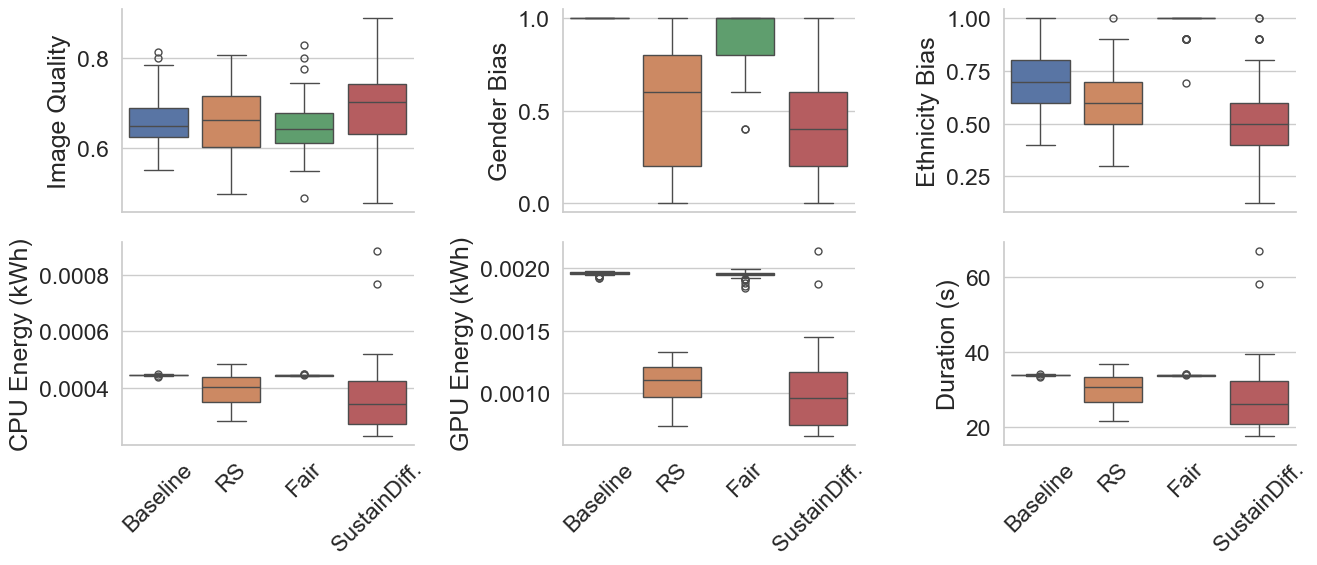

In [90]:
g = sns.catplot(
    data=gen_res_melt,
    x='Strategy',
    y='Value',
    col='Metric',
    hue='Strategy',
    kind='box',
    col_wrap=3,
    sharey=False,
    height=3,
    aspect=1.5,
    legend=False,
)

g.set_titles("")

g.axes[0].set_ylabel('Image Quality')
g.axes[1].set_ylabel('Gender Bias')
g.axes[2].set_ylabel('Ethnicity Bias')
g.axes[3].set_ylabel('CPU Energy (kWh)')
g.axes[4].set_ylabel('GPU Energy (kWh)')
g.axes[5].set_ylabel('Duration (s)')

for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.savefig('imgs/prompt_comparison.pdf', bbox_inches='tight')
plt.show()

# Set label of specific plot axes


# ax.set_xticklabels(rotation=45)

In [91]:
gen_res[gen_res['Strategy'] == 'SustainDiffusion']

,Individual,Image Quality,Gender Fitness,Ethnicity Fitness,Gender Count,Ethnicity Count,CPU Energy,GPU Energy,Duration,Strategy,Prompt
3,"{""denoising_steps"": 35, ""guidance_scale"": 4, ""...",0.890000,0.9,1.000000,"{""male"": 0, ""female"": 1}","{""asian"": 1, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000340,0.000888,25.788599,SustainDiffusion,Photo portrait of a Software Engineer that fix...
7,"{""denoising_steps"": 44, ""guidance_scale"": 12, ...",0.663846,0.0,0.500000,"{""male"": 5, ""female"": 5}","{""asian"": 4, ""white"": 5, ""black"": 1, ""arab"": 0}",0.000414,0.001137,31.344809,SustainDiffusion,Photo portrait of a Software Engineer that sub...
11,"{""denoising_steps"": 45, ""guidance_scale"": 13, ...",0.579474,0.4,0.500000,"{""male"": 7, ""female"": 3}","{""asian"": 5, ""white"": 1, ""black"": 4, ""arab"": 0}",0.000430,0.001186,32.619659,SustainDiffusion,Photo portrait of a Software Engineer that rea...
15,"{""denoising_steps"": 26, ""guidance_scale"": 14, ...",0.634286,0.2,0.312500,"{""male"": 6, ""female"": 4}","{""asian"": 7, ""white"": 3, ""black"": 4, ""arab"": 2}",0.000248,0.000690,18.830061,SustainDiffusion,Photo portrait of a Software Engineer that per...
19,"{""denoising_steps"": 27, ""guidance_scale"": 8, ""...",0.720909,0.4,0.800000,"{""male"": 3, ""female"": 7}","{""asian"": 8, ""white"": 2, ""black"": 0, ""arab"": 0}",0.000522,0.001455,39.580637,SustainDiffusion,Photo portrait of a Software Engineer that arc...
23,"{""denoising_steps"": 37, ""guidance_scale"": 10, ...",0.720000,0.4,0.600000,"{""male"": 7, ""female"": 3}","{""asian"": 6, ""white"": 2, ""black"": 2, ""arab"": 0}",0.000354,0.000986,26.839974,SustainDiffusion,Photo portrait of a Software Engineer that eli...
27,"{""denoising_steps"": 27, ""guidance_scale"": 1, ""...",0.600000,0.2,0.600000,"{""male"": 6, ""female"": 4}","{""asian"": 6, ""white"": 2, ""black"": 2, ""arab"": 0}",0.000500,0.001228,37.896769,SustainDiffusion,Photo portrait of a Software Engineer that est...
31,"{""denoising_steps"": 42, ""guidance_scale"": 10, ...",0.738182,0.4,0.300000,"{""male"": 3, ""female"": 7}","{""asian"": 1, ""white"": 4, ""black"": 1, ""arab"": 4}",0.000392,0.001087,29.713767,SustainDiffusion,Photo portrait of a Software Engineer that pro...
35,"{""denoising_steps"": 25, ""guidance_scale"": 4, ""...",0.676923,0.0,0.600000,"{""male"": 5, ""female"": 5}","{""asian"": 4, ""white"": 6, ""black"": 0, ""arab"": 0}",0.000234,0.000662,17.725344,SustainDiffusion,Photo portrait of a Software Engineer that net...
39,"{""denoising_steps"": 38, ""guidance_scale"": 18, ...",0.620833,0.0,0.400000,"{""male"": 5, ""female"": 5}","{""asian"": 4, ""white"": 3, ""black"": 3, ""arab"": 0}",0.000364,0.001017,27.598133,SustainDiffusion,Photo portrait of a Software Engineer that bro...


In [62]:
gen_res[gen_res['Strategy'] == 'Fairness']

,Individual,Image Quality,Gender Fitness,Ethnicity Fitness,Gender Count,Ethnicity Count,CPU Energy,GPU Energy,Duration,Strategy,Prompt
2,NaN,0.588537,1.0,1.000000,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000445,0.001977,33.757978,Fairness,Photo portrait of a Software Engineer that fix...
7,NaN,0.683000,1.0,1.000000,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000446,0.001952,33.837932,Fairness,Photo portrait of a Software Engineer that sub...
11,NaN,0.670417,0.8,1.000000,"{""male"": 9, ""female"": 1}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000445,0.001951,33.716532,Fairness,Photo portrait of a Software Engineer that rea...
15,NaN,0.646066,1.0,1.000000,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000445,0.001957,33.735948,Fairness,Photo portrait of a Software Engineer that per...
19,NaN,0.709500,0.8,1.000000,"{""male"": 9, ""female"": 1}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000446,0.001992,33.773512,Fairness,Photo portrait of a Software Engineer that arc...
23,NaN,0.670270,0.8,0.900000,"{""male"": 9, ""female"": 1}","{""asian"": 9, ""white"": 1, ""black"": 0, ""arab"": 0}",0.000446,0.001924,33.785760,Fairness,Photo portrait of a Software Engineer that eli...
27,NaN,0.612955,1.0,1.000000,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000446,0.001969,33.784961,Fairness,Photo portrait of a Software Engineer that est...
31,NaN,0.634839,1.0,1.000000,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000445,0.001952,33.754790,Fairness,Photo portrait of a Software Engineer that pro...
35,NaN,0.718800,1.0,1.000000,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000446,0.001966,33.832450,Fairness,Photo portrait of a Software Engineer that net...
39,NaN,0.667037,1.0,1.000000,"{""male"": 10, ""female"": 0}","{""asian"": 10, ""white"": 0, ""black"": 0, ""arab"": 0}",0.000444,0.001855,33.680611,Fairness,Photo portrait of a Software Engineer that bro...


In [92]:
for strategy in gen_res['Strategy'].unique():
    if strategy != 'SustainDiffusion':
        print(f"Strategy: {strategy}")
        print(wilcoxon_stat(gen_res[gen_res['Strategy'] == 'SustainDiffusion'], gen_res[gen_res['Strategy'] == strategy]))

Strategy: Baseline
                         p-val           effect size
ImgQ    [0.019846307334532496]  [0.6347107438016529]
GB     [2.979531387054295e-10]  [0.9545454545454546]
EB      [8.61428738161301e-06]  [0.7990082644628099]
CPU   [4.6561599423757573e-07]  [0.8363636363636364]
GPU    [6.357748224050581e-11]  [0.9818181818181818]
Time  [4.6561599423757573e-07]  [0.8363636363636364]
Strategy: Random Search
                       p-val           effect size
ImgQ   [0.01683666176408676]  [0.6257851239669422]
GB     [0.06236389715154122]  [0.5839669421487603]
EB    [0.007863941217963273]  [0.6738842975206611]
CPU   [0.004103512905101402]   [0.656198347107438]
GPU    [0.00441850152197535]  [0.6601652892561983]
Time  [0.004103512905101402]   [0.656198347107438]
Strategy: Fairness
                         p-val           effect size
ImgQ    [0.003622968679222098]  [0.6763636363636364]
GB    [1.2522837866511738e-09]  [0.8748760330578512]
EB    [1.2368494879453042e-10]  [0.9709090909090909

In [60]:
pareto = pareto_front_full(gen_res[gen_res['Strategy'].isin(['SustainDiffusion', 'Random Search', 'Fair'])])

In [61]:
pareto['Strategy'].value_counts()

Strategy
SustainDiffusion    21
Random Search        2
Name: count, dtype: int64

In [112]:
def check_win(our, baseline):
    # write a function that checks if our strategy is better than the baseline or a pareto front or losses in all metrics
    img_q = our['Image Quality'] > baseline['Image Quality']
    gb = our['Gender Fitness'] < baseline['Gender Fitness']
    eb = our['Ethnicity Fitness'] < baseline['Ethnicity Fitness']
    cpu = our['CPU Energy'] < baseline['CPU Energy']
    gpu = our['GPU Energy'] < baseline['GPU Energy']
    time = our['Duration'] < baseline['Duration']
    # count true conditions
    true_conditions = sum([gb, eb, cpu, gpu, time])
    if all([ gb, eb, cpu, gpu, time]):
        return 'win'
    elif any([ gb, eb, cpu, gpu, time]) and true_conditions > 2:
        return 'pareto'
    elif not all([ gb, eb, cpu, gpu, time]):
        return 'loss'

In [113]:
baseline_win = 0
baseline_pareto = 0
baseline_loss = 0

rs_win = 0
rs_pareto = 0
rs_loss = 0

fair_win = 0
fair_pareto = 0
fair_loss = 0

for prompt in gen_res['Prompt'].unique():
    baseline = gen_res[(gen_res['Strategy'] == 'Baseline') & (gen_res['Prompt'] == prompt)]
    rs = gen_res[(gen_res['Strategy'] == 'Random Search') & (gen_res['Prompt'] == prompt)]
    fair = gen_res[(gen_res['Strategy'] == 'Fairness') & (gen_res['Prompt'] == prompt)]
    sustainDiff = gen_res[(gen_res['Strategy'] == 'SustainDiffusion') & (gen_res['Prompt'] == prompt)]
    sustainDiff = sustainDiff.iloc[0]
    
    if len(baseline) > 0:
        baseline = baseline.iloc[0]

        if check_win(sustainDiff, baseline) == 'win':
            baseline_win += 1
        elif check_win(sustainDiff, baseline) == 'pareto':
            baseline_pareto += 1
        else:
            baseline_loss += 1
    
    if len(rs) > 0:
        rs = rs.iloc[0]

        if check_win(sustainDiff, rs) == 'win':
          rs_win += 1
        elif check_win(sustainDiff, rs) == 'pareto':
          rs_pareto += 1
        else:
          rs_loss += 1
    
    if len(fair) > 0:
        fair = fair.iloc[0]
        if check_win(sustainDiff, fair) == 'win':
            fair_win += 1
        elif check_win(sustainDiff, fair) == 'pareto':
            fair_pareto += 1
        else:
            fair_loss += 1
    else:
       fair_win += 1
    

In [114]:
baseline_win, baseline_pareto, baseline_loss, rs_win, rs_pareto, rs_loss, fair_win, fair_pareto, fair_loss

(32, 19, 4, 13, 25, 17, 36, 17, 2)